<a href="https://colab.research.google.com/github/Manjinder-Singh/AdvancedDatabaseTopics/blob/main/Presenting%20KPIs%20after%20Outlier%20Detection%20and%20Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Database Topics - Final Project Submission Code

## Details about the Project:
#### 1. Outlier Detection and Treatment using replacement of outliers with mean or median or dropping the outlier values
#### 2. Calculating KPIs
#### 3. Presenting data as well as KPIs using Matplotlib and Plotly Library.



In [ ]:
#1
# Import Required Header Files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from scipy.stats import zscore

# CSV file
file_path = './superstore_data.csv'

# Load data from the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Displaying the first 2 rows of the DataFrame:
print(df.head(2))

          Category        City        Country Customer Gender Customer Id  \
0        Furniture     Porirua    New Zealand          Female    TS-21340   
1  Office Supplies  Alexandria  United States            Male    GM-14695   

   Customer Name Customer Subscription Type  Discount Market  Order Date  ...  \
0  Toby Swindell            Normal Customer       0.0   APAC  07-11-2011  ...   
1   Greg Maxwell            Normal Customer       0.0     US  05-04-2011  ...   

     Sales    Segment   Ship Date     Ship Mode  Shipping Cost       State  \
0  1822.08   Consumer  09-11-2011   First Class         894.77  Wellington   
1  4164.05  Corporate  09-04-2011  Second Class         846.54    Virginia   

  Sub Category  Number of Records Order Rating  Shipping Day  
0       Chairs                  1         7.17          62.0  
1     Supplies                  1         9.06         123.0  

[2 rows x 32 columns]


In [ ]:
#2
# Get the column names of the DataFrame 'df'
column_names = df.columns

# Print the column names
print("List of Column Names:- ",column_names)

# Drop a specific column from the DataFrame 'df'
column_to_drop = ['Postal Code','Shipping Day']  # Replace 'Column_Name' with the name of the column you want to drop
df_cleaned = df.drop(column_to_drop, axis=1)

# Now 'df_cleaned' will be a new DataFrame with the specified column removed.
# If you want to modify the original DataFrame 'df', use the 'inplace=True' parameter:
# For example, to drop the column directly in 'df':
#df.drop(column_to_drop, axis=1, inplace=True)

In [ ]:
#3
df_cleaned.head(2)

,Category,City,Country,Customer Gender,Customer Id,Customer Name,Customer Subscription Type,Discount,Market,Order Date,...,Row Id,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub Category,Number of Records,Order Rating
0,Furniture,Porirua,New Zealand,Female,TS-21340,Toby Swindell,Normal Customer,0.0,APAC,07-11-2011,...,30570,1822.08,Consumer,09-11-2011,First Class,894.77,Wellington,Chairs,1,7.17
1,Office Supplies,Alexandria,United States,Male,GM-14695,Greg Maxwell,Normal Customer,0.0,US,05-04-2011,...,34577,4164.05,Corporate,09-04-2011,Second Class,846.54,Virginia,Supplies,1,9.06


In [ ]:
#4
# Fetching numeric columsn from dataset based on data type.
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
print(df_cleaned.count())

# Print the names of numeric columns
print("Numeric Columns:")
print(numeric_columns)

# Printing the type of Numeric columns to verify
print(type(numeric_columns))


Category                      7436
City                          7436
Country                       7436
Customer Gender               7436
Customer Id                   7436
Customer Name                 7436
Customer Subscription Type    7436
Discount                      7436
Market                        7436
Order Date                    7436
Order Date DateType           7436
Order Id                      7436
Order Priority                7436
Payment Mode                  7436
Product Id                    7436
Product Name                  7436
Profit                        7436
Profit (ColorCode)            7436
Quantity                      7436
Region                        7436
Row Id                        7436
Sales                         7436
Segment                       7436
Ship Date                     7436
Ship Mode                     7436
Shipping Cost                 7436
State                         7436
Sub Category                  7436
Number of Records   

In [ ]:
#5
# Creating copy of dataframe
df_cleaned_copy= pd.DataFrame()
df_cleaned_copy =df_cleaned.copy()

# isna() and isnull() are equivalent and return a DataFrame of the same shape as 'df' with True for NaN values and False for non-NaN values
empty_values_mask = df_cleaned.isna()

# Count the number of empty values in each column
empty_values_count = empty_values_mask.sum()

# Print the count of empty values in each column
print("Count of empty values in each column:")
print(empty_values_count)

Count of empty values in each column:
Category                      0
City                          0
Country                       0
Customer Gender               0
Customer Id                   0
Customer Name                 0
Customer Subscription Type    0
Discount                      0
Market                        0
Order Date                    0
Order Date DateType           0
Order Id                      0
Order Priority                0
Payment Mode                  0
Product Id                    0
Product Name                  0
Profit                        0
Profit (ColorCode)            0
Quantity                      0
Region                        0
Row Id                        0
Sales                         0
Segment                       0
Ship Date                     0
Ship Mode                     0
Shipping Cost                 0
State                         0
Sub Category                  0
Number of Records             0
Order Rating                  0
dt

In [ ]:
#6
# Filter the numeric columns in the DataFrame
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64'])
print("NUMERIC COLUMNS DATAFRAME:- ")
print(numeric_columns.head(2))
print("\nTYPE OF COLUMNS OF NUMERIC COLUMNS DATAFRAME:- ",type(numeric_columns))
print("\nCOLUMNS LIST OF NUMERIC COLUMNS DATAFRAME:- ",numeric_columns.columns)

# Now, the DataFrame 'df' will not contain columns with "id" or record in their name.
columns_to_drop = [col for col in numeric_columns.columns if 'id' in col.lower() or 'record' in col.lower()]
filter_df = numeric_columns.drop(columns=columns_to_drop, axis=1)
print("\nNEW FILTERED DF:- ",filter_df.head(2))

NUMERIC COLUMNS DATAFRAME:- 
   Discount     Profit  Quantity       Sales  Shipping Cost  Order Rating
0       0.0  29.452609  3.483728  245.804312      25.948167       6.99966
1       0.0  29.452609  3.483728  245.804312      25.948167       6.99966

TYPE OF COLUMNS OF NUMERIC COLUMNS DATAFRAME:-  <class 'pandas.core.frame.DataFrame'>

COLUMNS LIST OF NUMERIC COLUMNS DATAFRAME:-  Index(['Discount', 'Profit', 'Quantity', 'Sales', 'Shipping Cost',
       'Order Rating'],
      dtype='object')


NEW FILTERED DF:- 

   Discount     Profit  Quantity       Sales  Shipping Cost  Order Rating
0       0.0  29.452609  3.483728  245.804312      25.948167       6.99966
1       0.0  29.452609  3.483728  245.804312      25.948167       6.99966


### Showing Outliers using Box Plot Method

In [ ]:
#7
# Create a boxplot for each numeric column
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
filter_df.boxplot()
plt.title('Outlier Detection using Boxplot for Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
plt.grid(True)  # Add grid lines (optional)
plt.show()


NameError: ignored

### Handling Outliers Value by replacing with the mean value.

In [ ]:
#8
filter_df_copy= pd.DataFrame()
filter_df_copy=filter_df.copy()

# Step 1: Calculate the mean of each column
column_means = filter_df_copy.mean()

# Step 2: Determine the outliers in each column
# Let's consider any value greater than the mean + 4 * standard deviation as an outlier
# We can adjust the outlier criteria based on your data and requirements.
outlier_threshold = column_means + 4 * filter_df_copy.std()

# Step 3: Replace the outliers with the mean value
for column in filter_df_copy.columns:
    is_outlier = filter_df_copy[column] > outlier_threshold[column]
    filter_df_copy.loc[is_outlier, column] = column_means[column]

# Now, the DataFrame 'df' will have outliers replaced with the mean value of each column.
print(filter_df_copy)

      Discount    Profit  Quantity        Sales  Shipping Cost  Order Rating
0          0.0  564.8400       4.0  1822.080000      25.948167          7.17
1          0.0   83.2810       5.0   245.804312      25.948167          9.06
2          0.0  276.8400       4.0  1977.720000      25.948167          5.27
3          0.0  358.0200       6.0   245.804312      25.948167          9.32
4          0.1  561.4800       5.0   245.804312      25.948167          6.59
...        ...       ...       ...          ...            ...           ...
7431       0.2  -43.8336       2.0   219.168000      16.560000          7.76
7432       0.4   17.1360       4.0   128.736000      21.050000          8.49
7433       0.7  -34.1820       3.0    28.458000       1.300000          6.55
7434       0.0    1.6038       3.0     5.940000       0.420000          6.82
7435       0.6  -19.3440       1.0    16.116000       0.750000          9.95

[7436 rows x 6 columns]


### Other Ways to Handle/Remove Outlier Values - Median, Mean or Drop Na, Null value.

In [ ]:
#9
filter_df_copy2= pd.DataFrame()
filter_df_copy2=filter_df.copy()
# Function to remove outliers using different methods
def remove_outliers(df, method):
    filter_df_copy2= pd.DataFrame()
    filter_df_copy2=filter_df.copy()
    # 1. Drop rows with NA/NULL values
    if method == 'drop_na':
        filter_df_copy2 = filter_df_copy2.dropna()

    # 2. Fill outlier values with the mean of each column
    elif method == 'fill_mean':
        filter_df_copy2 = filter_df_copy2.apply(lambda col: col.mask(col > col.mean(), col.mean()))

    # 3. Fill outlier values with the median of each column
    elif method == 'fill_median':
        filter_df_copy2 = filter_df_copy2.apply(lambda col: col.mask(col > col.median(), col.median()))

    return filter_df_copy2

# Select the method you want to use to remove outliers (options: 'drop_na', 'fill_mean', 'fill_median')
outlier_removal_method = 'drop_na'

# Call the function to remove outliers based on the selected method
df_cleaned = remove_outliers(filter_df_copy2, outlier_removal_method)

print("\nFiltered DataFrame:\n")
print(filter_df.head(5))

print("\nDataFrame after outlier removal:\n")
print(df_cleaned.head(5))

# Specify the file path and name for the CSV file
file_path = 'treated_data/df_cleaned.csv'

# Save the DataFrame to the CSV file
df_cleaned.to_csv(file_path, index=False)



Filtered DataFrame:

   Discount   Profit  Quantity    Sales  Shipping Cost  Order Rating
0       0.0  564.840         4  1822.08         894.77          7.17
1       0.0   83.281         5  4164.05         846.54          9.06
2       0.0  276.840         4  1977.72         759.47          5.27
3       0.0  358.020         6  2754.00         752.47          9.32
4       0.1  561.480         5  2526.93         689.80          6.59

DataFrame after outlier removal:

   Discount     Profit  Quantity       Sales  Shipping Cost  Order Rating
0       0.0  29.452609  3.483728  245.804312      25.948167       6.99966
1       0.0  29.452609  3.483728  245.804312      25.948167       6.99966
2       0.0  29.452609  3.483728  245.804312      25.948167       5.27000
3       0.0  29.452609  3.483728  245.804312      25.948167       6.99966
4       0.1  29.452609  3.483728  245.804312      25.948167       6.59000


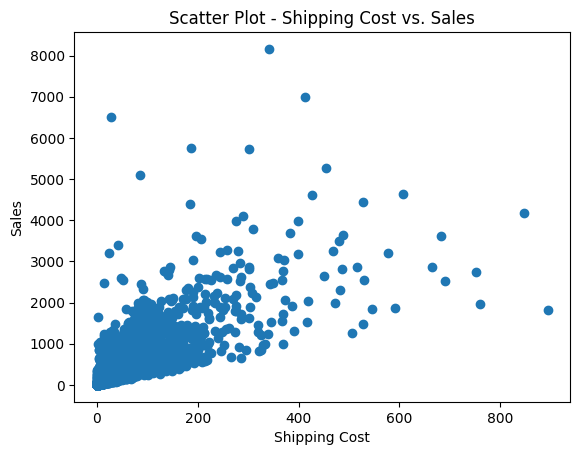

In [ ]:
#10 Plotting Data using Scatter Plot
'''
Best Choice for scatter plot as per Dataset:
1. Profit vs. Sales
2. Sales vs. Quantity
3. Profit vs. Discount
4. Shipping Cost vs. Sales
5. Order Rating vs. Sales
'''
#Scatter Plot
plt.scatter( filter_df['Shipping Cost'],filter_df['Sales'])

# Add labels and title
plt.xlabel("Shipping Cost")
plt.ylabel("Sales")
plt.title("Scatter Plot - Shipping Cost vs. Sales")

# Show the plot
plt.show()

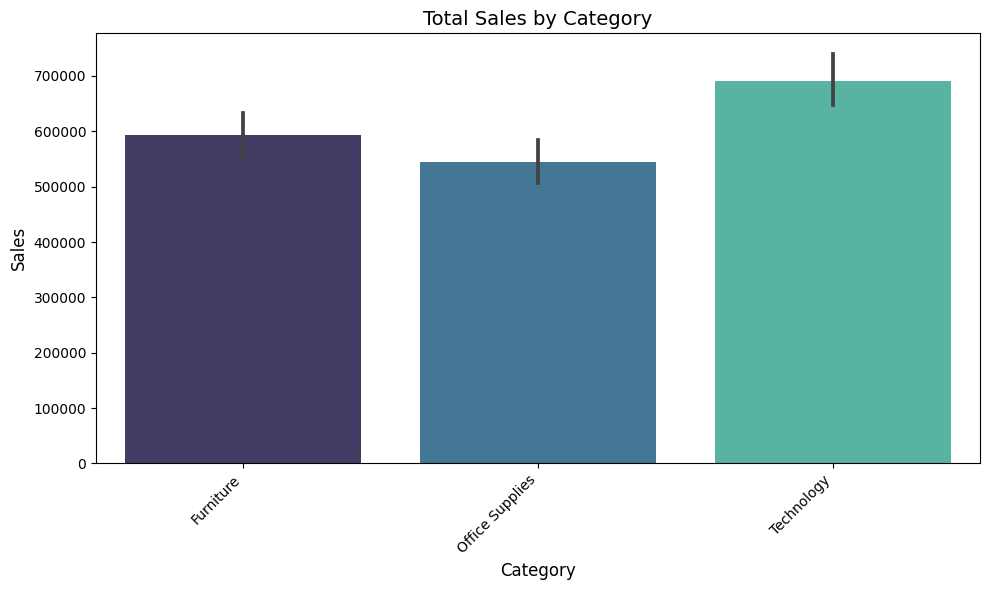

In [ ]:
#11

# Let's consider a subset of columns for demonstration purposes.
subset_columns = ['Category', 'City', 'Country', 'Sales', 'Profit', 'Quantity', 'Order Date', 'Order Priority']
custom_palette = sns.color_palette("mako", n_colors=len(df['Category'].unique()))

# Bar Chart for Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, palette=custom_palette)
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


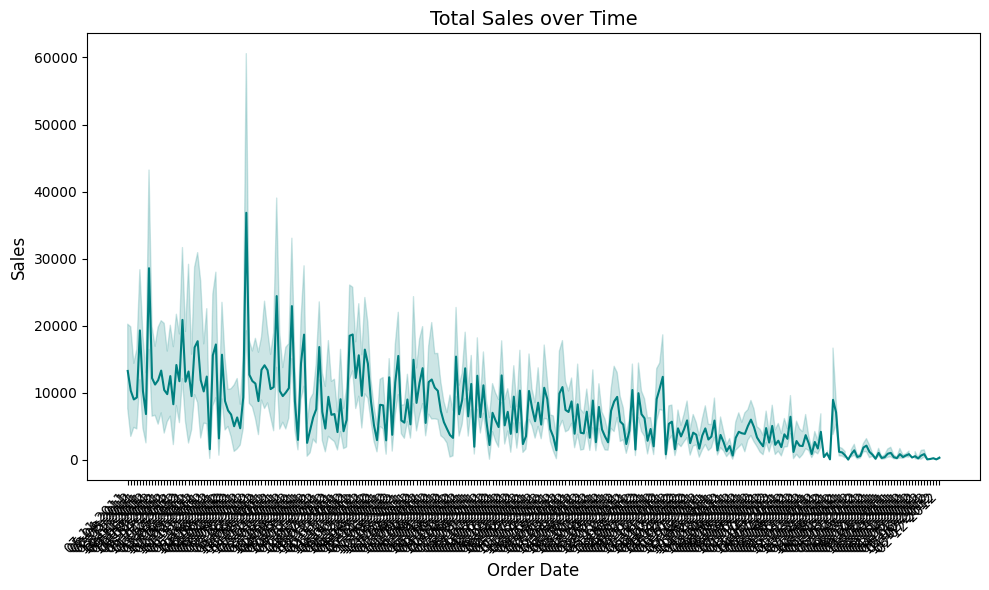

In [ ]:
#12
# Line Chart for Sales over Time (Order Date)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Sales', data=df, estimator=sum, color='teal')
plt.title('Total Sales over Time', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

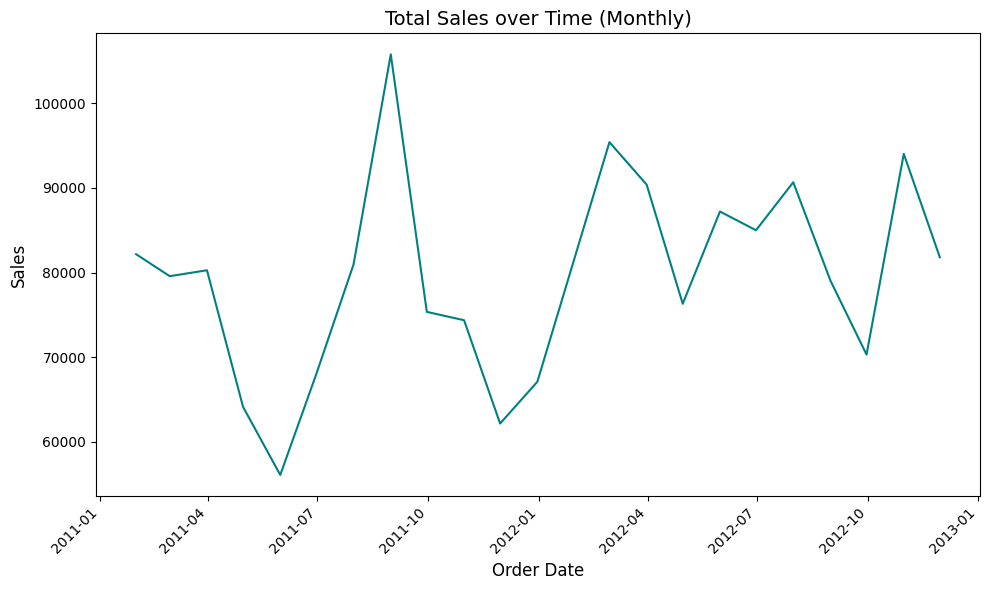

In [ ]:
#13
# Line Chart for Sales over Time (Order Date - Group by Month)

# Convert 'Order Date' to pandas datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group data on a monthly basis and calculate monthly sales
monthly_sales = df.set_index('Order Date')['Sales'].resample('M').sum()

# Line Chart for Sales over Time (Order Date) on a monthly basis
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='teal')
plt.title('Total Sales over Time (Monthly)', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

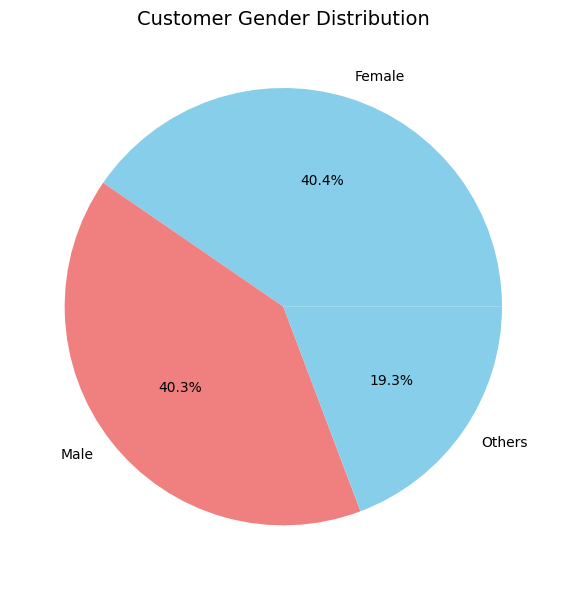

In [ ]:
#14
# Pie Chart for Customer Gender Distribution
plt.figure(figsize=(6, 6))
df['Customer Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Customer Gender Distribution', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

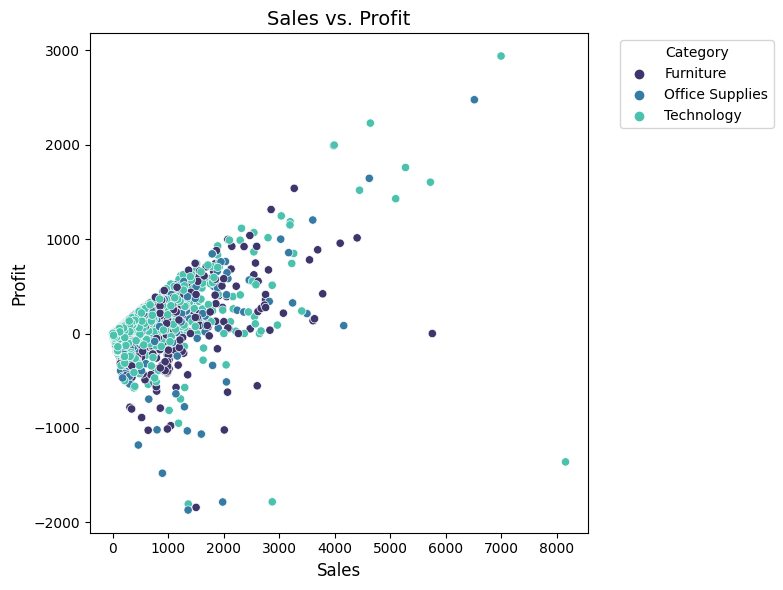

In [ ]:
#15
# Scatter Plot for Sales vs. Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', palette=custom_palette)
plt.title('Sales vs. Profit', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

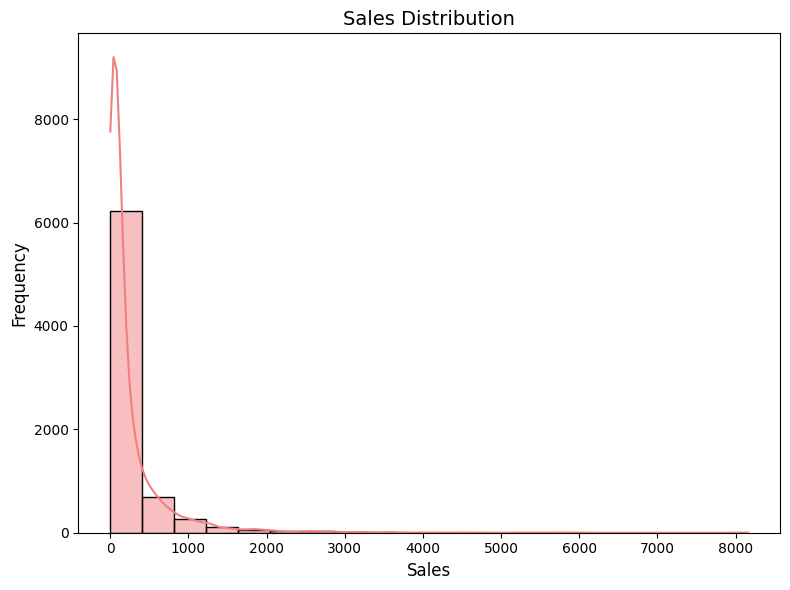

In [ ]:
#16
# Histogram for Sales Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=20, kde=True, color='lightcoral')
plt.title('Sales Distribution', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

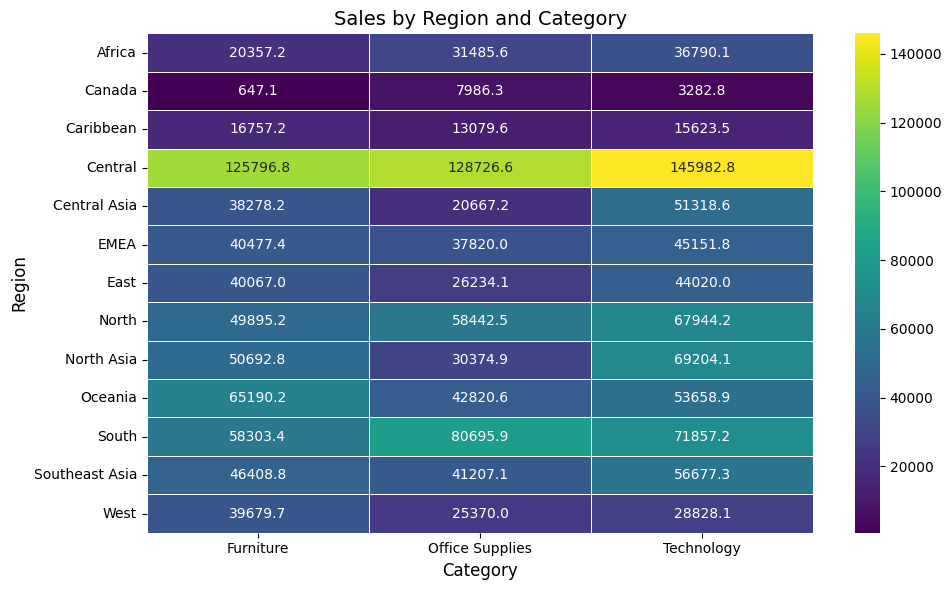

In [ ]:
#17
# Heatmap for Sales by Region and Category
heatmap_data = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Sales by Region and Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

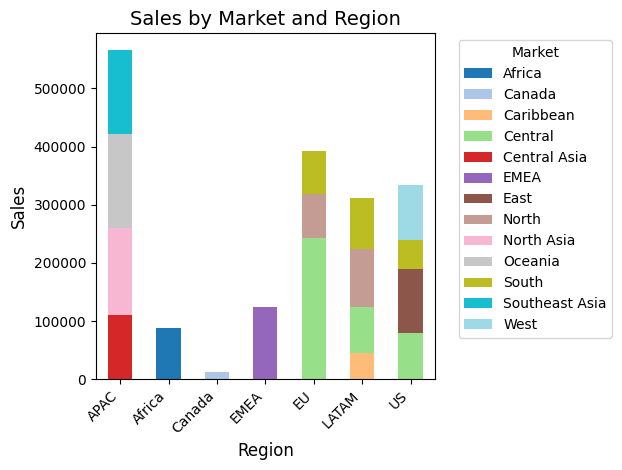

In [ ]:
#18
# Stacked Bar Chart for Sales by Market and Region
plt.figure(figsize=(10, 6))
df.groupby(['Market', 'Region'])['Sales'].sum().unstack().plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Sales by Market and Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

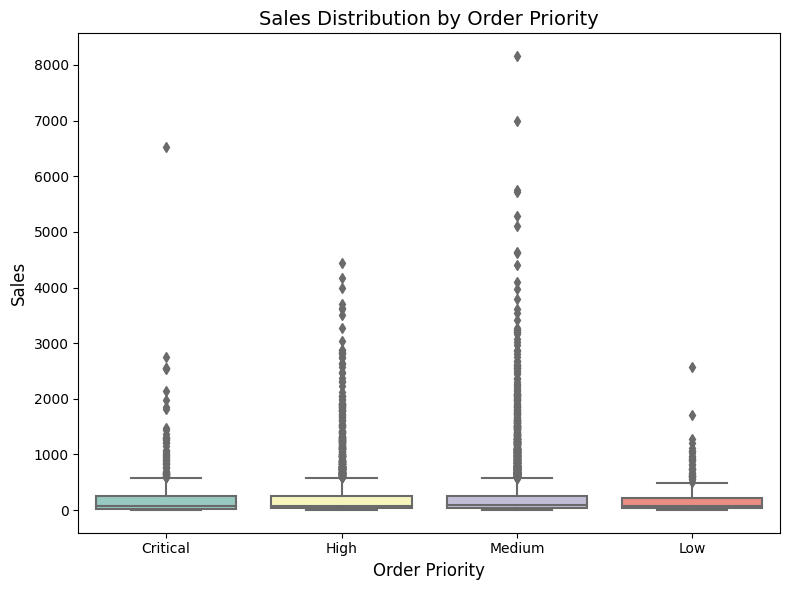

In [ ]:
#19
# Box Plot for Sales Distribution by Order Priority
plt.figure(figsize=(8, 6))
sns.boxplot(x='Order Priority', y='Sales', data=df, palette='Set3')
plt.title('Sales Distribution by Order Priority', fontsize=14)
plt.xlabel('Order Priority', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.tight_layout()
plt.show()

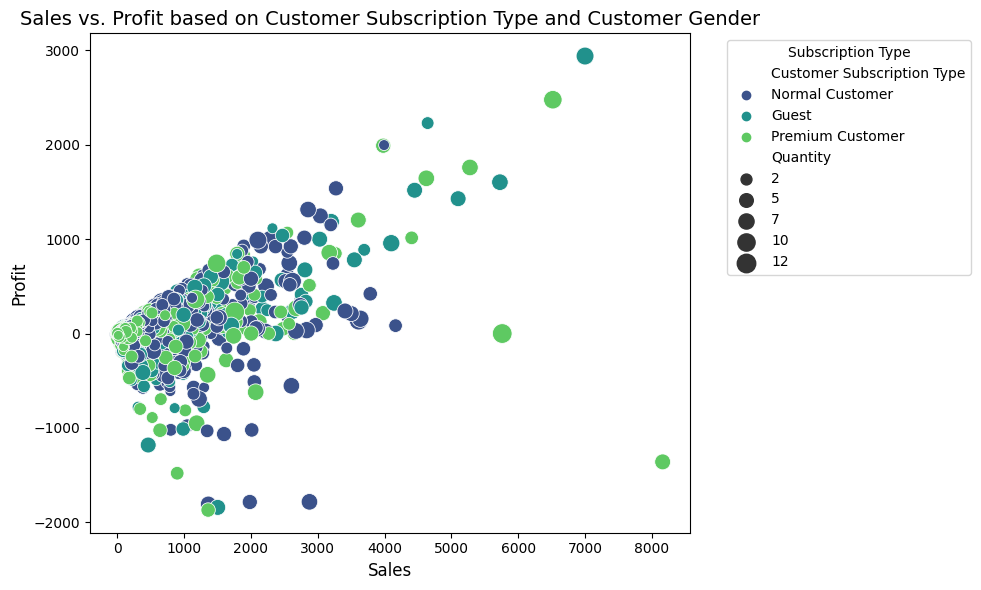

In [ ]:
#20
# Bubble Chart for Sales vs. Profit based on Customer Subscription Type and Customer Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, size='Quantity', hue='Customer Subscription Type', sizes=(50, 200), palette='viridis')
plt.title('Sales vs. Profit based on Customer Subscription Type and Customer Gender', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#21 V1
# Advanced Visualization 1: Line Chart with Trendline
fig1 = px.line(df, x='Order Date', y='Sales', title='Sales Trend over Time', labels={'Sales': 'Sales Value'})
fig1.update_traces(line=dict(color='teal'), mode='lines+markers')
fig1.update_layout(showlegend=False)
fig1.show()


In [ ]:
#21 V2
# Convert 'Order Date' to pandas datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month from 'Order Date' as a string (Month-Year format)
df['Month'] = df['Order Date'].dt.strftime('%b %Y')

# Group data on a monthly basis and calculate monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Advanced Visualization 1: Line Chart with Trendline (Category by Month)
fig1 = px.line(monthly_sales, x='Month', y='Sales', title='Sales Trend by Month', labels={'Sales': 'Sales Value'})
fig1.update_traces(line=dict(color='teal'), mode='lines+markers')
fig1.update_layout(showlegend=False)
fig1.show()


In [ ]:
#22
# Advanced Visualization 2: Bar Chart with Annotations
top_sales_categories = df.groupby('Category')['Sales'].sum().nlargest(5).reset_index()
fig2 = px.bar(top_sales_categories, x='Category', y='Sales', color='Category',
              labels={'Sales': 'Total Sales Value'},
              title='Top 5 Sales Categories')
fig2.update_traces(marker_line_color='black', marker_line_width=1.5)
fig2.update_layout(showlegend=False)
fig2.show()

In [ ]:
#23
# Advanced Visualization 3: Sunburst Chart
fig3 = px.sunburst(df, path=['Country', 'Region', 'Category'], values='Sales',
                   title='Sales Breakdown by Country, Region, and Category')
fig3.update_traces(hoverinfo='label+percent parent')
fig3.show()

In [ ]:
#24
# Advanced Visualization 4: Scatter 3D Plot
fig4 = px.scatter_3d(df, x='Quantity', y='Profit', z='Sales', color='Category',
                     title='Sales, Profit, and Quantity in 3D')
fig4.update_layout(scene=dict(xaxis_title='Quantity', yaxis_title='Profit', zaxis_title='Sales'))
fig4.show()

In [ ]:
#25
# Advanced Visualization 5: Animated Bubble Chart
fig5 = px.scatter(df, x='Sales', y='Profit', animation_frame='Order Date', animation_group='Category',
                  size='Quantity', color='Category', range_x=[0, 450], range_y=[0, 250],
                  title='Sales vs. Profit with Quantity Animation')
fig5.update_layout(showlegend=False)
fig5.show()


Average Purchase Value: 1483.604597353896
Purchase Frequency: 6.035714285714286
Average Customer Lifespan (months): 8.86301406926407
Customer Lifetime Value (CLV): 79364.86510384791


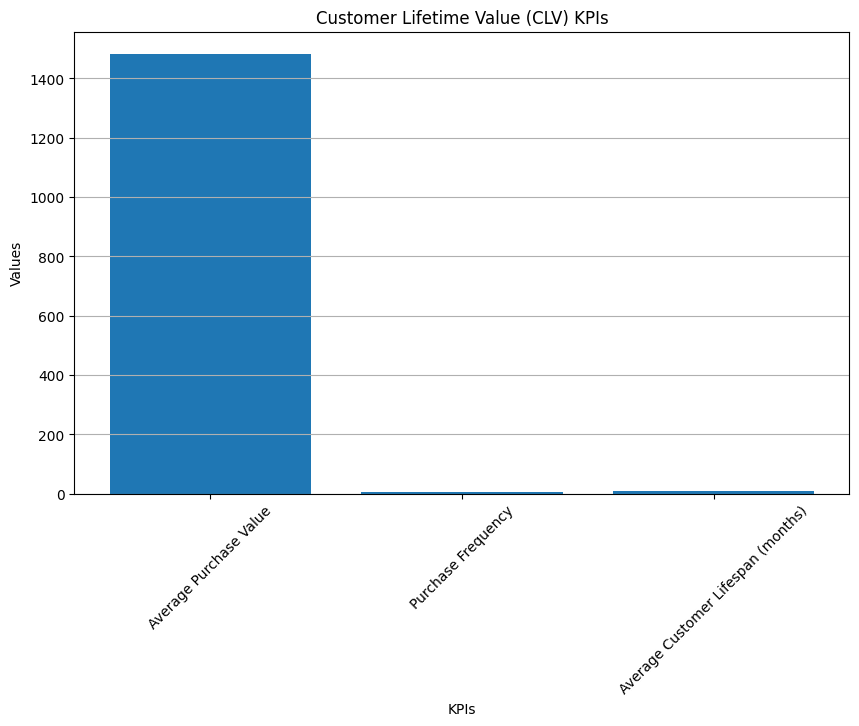

In [ ]:
#26
# Calculate Average Purchase Value
average_purchase_value = df['Sales'].sum() / df['Customer Id'].nunique()

# Calculate Purchase Frequency
purchase_frequency = df['Customer Id'].count() / df['Customer Id'].nunique()

# Calculate Customer Lifespan (in months) for each customer
customer_lifespan = (df.groupby('Customer Id')['Order Date'].max() - df.groupby('Customer Id')['Order Date'].min()).dt.days / 30

# Calculate Customer Lifetime Value (CLV)
clv = average_purchase_value * purchase_frequency * customer_lifespan.mean()

# Display the calculated KPIs
print("Average Purchase Value:", average_purchase_value)
print("Purchase Frequency:", purchase_frequency)
print("Average Customer Lifespan (months):", customer_lifespan.mean())
print("Customer Lifetime Value (CLV):", clv)

# Create a bar chart to visualize the KPIs
#kpi_labels = ['Average Purchase Value', 'Purchase Frequency', 'Average Customer Lifespan (months)', 'Customer Lifetime Value (CLV)']
kpi_labels = ['Average Purchase Value', 'Purchase Frequency', 'Average Customer Lifespan (months)']

#kpi_values = [average_purchase_value, purchase_frequency, customer_lifespan.mean(), clv]
kpi_values = [average_purchase_value, purchase_frequency, customer_lifespan.mean()]

plt.figure(figsize=(10, 6))
plt.bar(kpi_labels, kpi_values)
plt.xlabel('KPIs')
plt.ylabel('Values')
plt.title('Customer Lifetime Value (CLV) KPIs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


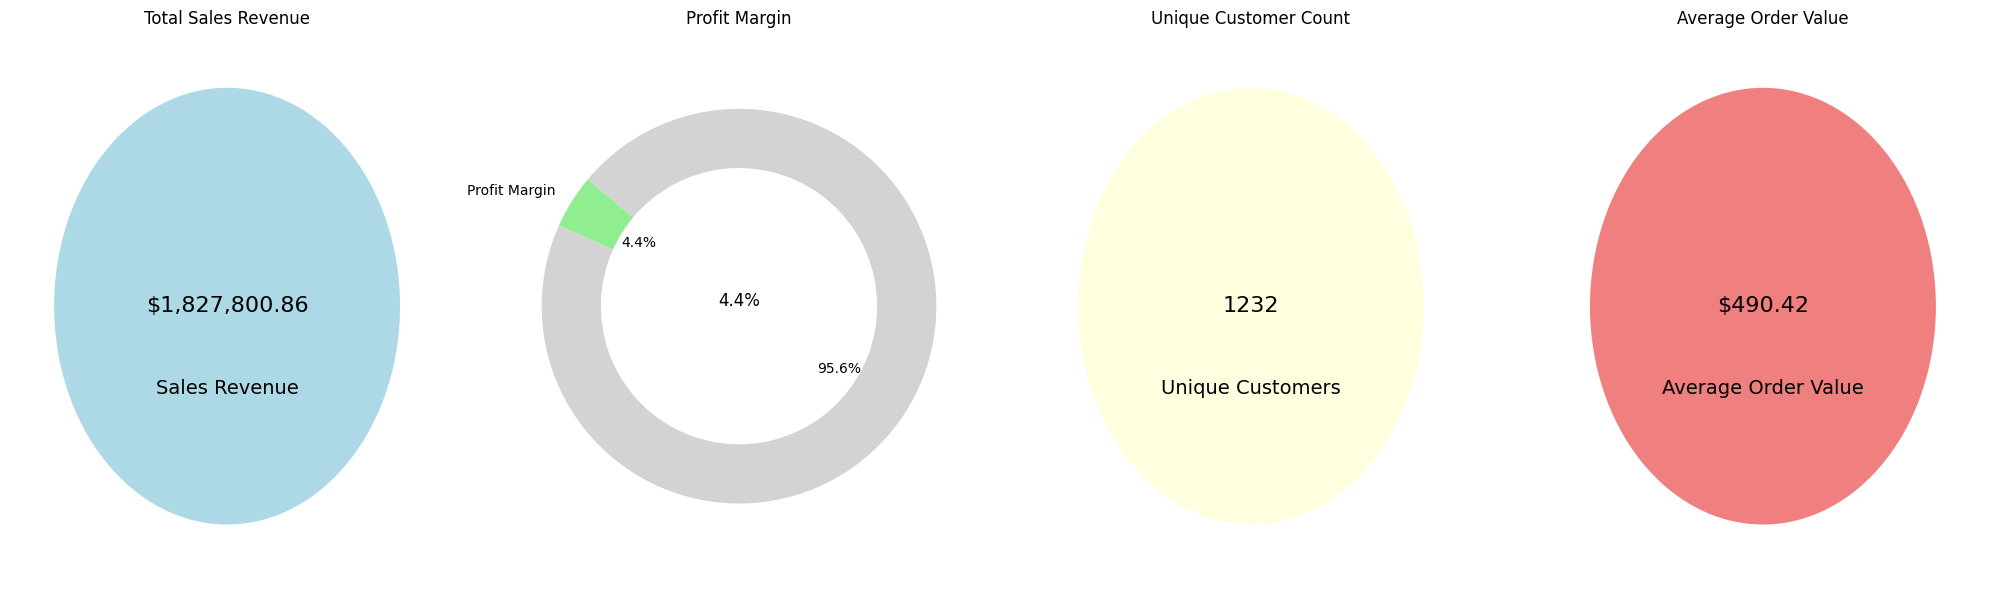

In [ ]:
#27 KPIS - Total Sales Revenue, Profit Margin, unique Customer Count,  Average Order Value
# Calculate Sales Revenue: Total revenue generated from sales
sales_revenue = df['Sales'].sum()

# Calculate Profit Margin: Percentage of profit earned from sales
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
profit_margin_mean = df['Profit Margin'].mean()

# Calculate Customer Count: Total number of unique customers
customer_count = df['Customer Id'].nunique()

# Calculate Average Order Value: Average value of each order
average_order_value = sales_revenue / df['Order Id'].nunique()

# Create a 1x4 grid for the subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Visualization 1: Circle chart for Sales Revenue with value and title
circle = plt.Circle((0.5, 0.5), 0.4, color='lightblue', ec='white')
axs[0].add_patch(circle)

axs[0].text(0.5, 0.5, f"${sales_revenue:,.2f}", ha='center', va='center', fontsize=16)
axs[0].text(0.5, 0.35, 'Sales Revenue', ha='center', va='center', fontsize=14)

axs[0].axis('off')
axs[0].set_title('Total Sales Revenue')
'''
# Visualization 2: Circle chart for Profit Margin with value and title
circle = plt.Circle((0.5, 0.5), 0.4, color='lightgreen', ec='white')
axs[1].add_patch(circle)

axs[1].text(0.5, 0.5, f"{profit_margin_mean:.1f}%", ha='center', va='center', fontsize=16)
axs[1].text(0.5, 0.35, 'Profit Margin', ha='center', va='center', fontsize=14)

axs[1].axis('off')
axs[1].set_title('Average Profit Margin')
'''

'''
# Visualization 2: Pie chart for Profit Margin
plt.figure(figsize=(8, 6))
profit_margin_mean = df['Profit Margin'].mean()
plt.pie([profit_margin_mean, 100 - profit_margin_mean], labels=['Profit Margin', ''],
        colors=['lightgreen', 'lightgray'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Profit Margin', loc='center')
plt.axis('equal')
plt.annotate(f"{profit_margin_mean:.1f}%", xy=(0.5, 0.5), xycoords='axes fraction', ha='center', fontsize=12)
plt.annotate(f"{100 - profit_margin_mean:.1f}%", xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=12)
plt.show()
'''
'''
# Visualization 2: Pie chart for Profit Margin
profit_margin_complement = 100 - profit_margin_mean
axs[1].pie([profit_margin_mean, profit_margin_complement], labels=[f'{profit_margin_mean:.1f}%', f'{profit_margin_complement:.1f}%'],
           colors=['lightgreen', 'lightgray'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
axs[1].set_title('Profit Margin')
axs[1].axis('equal')
'''
# Visualization 2: Donut pie chart for Profit Margin with annotation
axs[1].pie([profit_margin_mean, 100 - profit_margin_mean], labels=['Profit Margin', ''],
           colors=['lightgreen', 'lightgray'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
axs[1].set_title('Profit Margin')
axs[1].axis('equal')
axs[1].annotate(f"{profit_margin_mean:.1f}%", xy=(0.5, 0.5), xycoords='axes fraction', ha='center', fontsize=12)
# Visualization 3: Circle chart for Customer Count with value and title
circle = plt.Circle((0.5, 0.5), 0.4, color='lightyellow', ec='white')
axs[2].add_patch(circle)

axs[2].text(0.5, 0.5, str(customer_count), ha='center', va='center', fontsize=16)
axs[2].text(0.5, 0.35, 'Unique Customers', ha='center', va='center', fontsize=14)

axs[2].axis('off')
axs[2].set_title('Unique Customer Count')

# Visualization 4: Circle chart for Average Order Value with value and title
circle = plt.Circle((0.5, 0.5), 0.4, color='lightcoral', ec='white')
axs[3].add_patch(circle)

axs[3].text(0.5, 0.5, f"${average_order_value:,.2f}", ha='center', va='center', fontsize=16)
axs[3].text(0.5, 0.35, 'Average Order Value', ha='center', va='center', fontsize=14)

axs[3].axis('off')
axs[3].set_title('Average Order Value')

plt.tight_layout()
plt.show()


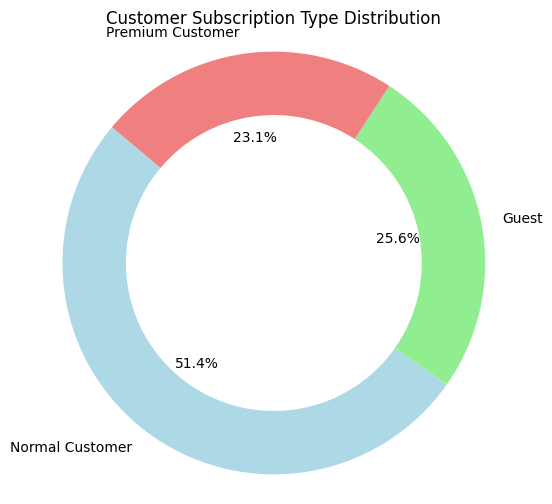

In [ ]:
#28 Customer Subscription TYPE KPI
# Step 1: Calculate customer count for each subscription type
customer_count_by_type = df['Customer Subscription Type'].value_counts()

# Step 2: Create a pie chart to visualize the distribution of customer subscription types
plt.figure(figsize=(6, 6))
plt.pie(customer_count_by_type, labels=customer_count_by_type.index, colors=['lightblue', 'lightgreen', 'lightcoral'],
        autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Customer Subscription Type Distribution')
plt.axis('equal')
plt.show()


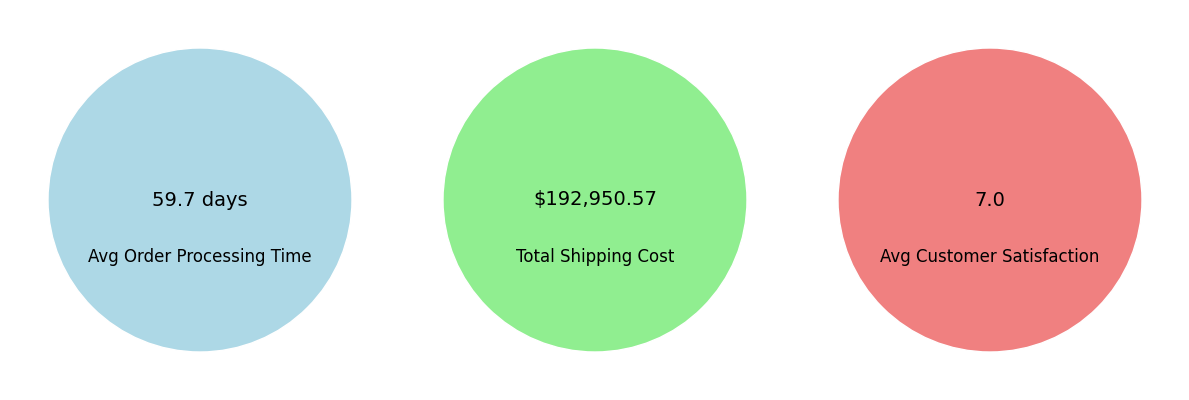

In [ ]:
#29 KPI - Average Order Processing Time, Total Shipping Cost, Average Customer Satisfaction
# Convert 'Order Date' and 'Ship Date' columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Order Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days
order_processing_time_avg = df['Order Processing Time'].mean()

# Step 2: Calculate the Shipping Cost
shipping_cost_total = df['Shipping Cost'].sum()

# Step 3: Calculate Customer Satisfaction (Order Rating)
customer_satisfaction_avg = df['Order Rating'].mean()

# Visualization: Circle chart for KPIs and their values
plt.figure(figsize=(12, 6))

# Plot circle for Average Order Processing Time
plt.subplot(131, aspect='equal')
circle = plt.Circle((0.5, 0.5), 0.4, color='lightblue', ec='white')
plt.gca().add_patch(circle)
plt.text(0.5, 0.5, f"{order_processing_time_avg:.1f} days", ha='center', va='center', fontsize=14)
plt.text(0.5, 0.35, 'Avg Order Processing Time', ha='center', va='center', fontsize=12)
plt.axis('off')

# Plot circle for Total Shipping Cost
plt.subplot(132, aspect='equal')
circle = plt.Circle((0.5, 0.5), 0.4, color='lightgreen', ec='white')
plt.gca().add_patch(circle)
plt.text(0.5, 0.5, f"${shipping_cost_total:,.2f}", ha='center', va='center', fontsize=14)
plt.text(0.5, 0.35, 'Total Shipping Cost', ha='center', va='center', fontsize=12)
plt.axis('off')

# Plot circle for Average Customer Satisfaction (Order Rating)
plt.subplot(133, aspect='equal')
circle = plt.Circle((0.5, 0.5), 0.4, color='lightcoral', ec='white')
plt.gca().add_patch(circle)
plt.text(0.5, 0.5, f"{customer_satisfaction_avg:.1f}", ha='center', va='center', fontsize=14)
plt.text(0.5, 0.35, 'Avg Customer Satisfaction', ha='center', va='center', fontsize=12)
plt.axis('off')


plt.tight_layout()
plt.show()


CALCULATED KPIS

customer_retention_rate:-  589.6915584415584
average_shipping_day:-  111.12284400153315
average_order_value:-  245.80431198762773
average_order_frequency:-  3.0251623376623376
customer_lifetime_value:-  8923.175364719693
average_profit_per_customer:-  177.767531038961
total_sales 1827800.8639399998
customer_retention_rate:-  589.6915584415584
roi:-  2190.0959823999997
sales_growth_rate:-  3555.60172788


average_discount_rate_per_category:-  Category
Furniture          0.159972
Office Supplies    0.140648
Technology         0.141609
Name: Discount, dtype: float64


average_quantity_per_order:-  3.4837278106508878
shipping_cost_ratio:-  10.55643280439624


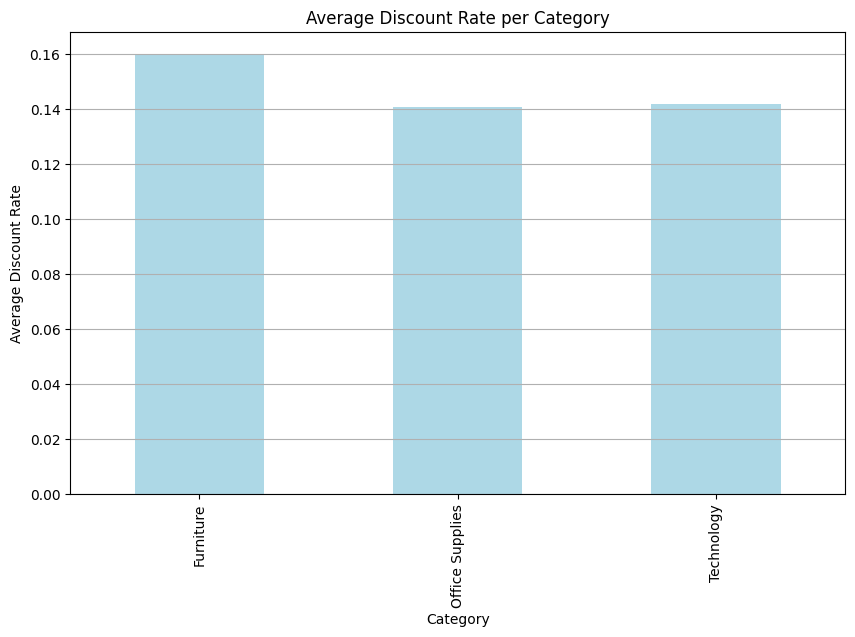

In [ ]:
#30
# Customer Retention Rate
repeat_customers = df[df.duplicated(subset='Customer Id', keep=False)]
customer_retention_rate = (len(repeat_customers) / df['Customer Id'].nunique()) * 100

# Average Shipping Day
average_shipping_day = df['Shipping Day'].mean()

# Customer Lifetime Value (CLV)
average_order_value = df['Sales'].mean()
average_order_frequency = df['Order Id'].nunique() / df['Customer Id'].nunique()
customer_lifetime = 12  # In months (You can set the desired customer lifetime)
customer_lifetime_value = average_order_value * average_order_frequency * customer_lifetime

# Average Profit per Customer
average_profit_per_customer = df['Profit'].sum() / df['Customer Id'].nunique()

# Return on Investment (ROI)
total_sales = df['Sales'].sum()
total_marketing_sales_costs = 10000  # Example: Set the total marketing and sales costs
roi = (df['Profit'].sum() / total_marketing_sales_costs) * 100

# Sales Growth Rate
previous_period_sales = 50000  # Example: Set the sales revenue of the previous period
sales_growth_rate = ((total_sales - previous_period_sales) / previous_period_sales) * 100

# Order Fulfillment Rate
#fulfilled_orders = df[df['Order Status'] == 'Fulfilled']
#order_fulfillment_rate = (len(fulfilled_orders) / len(df)) * 100

# Customer Churn Rate
#churned_customers = df[df['Churned'] == 1]
#customer_churn_rate = (len(churned_customers) / df['Customer Id'].nunique()) * 100

# Average Discount Rate per Category
average_discount_rate_per_category = df.groupby('Category')['Discount'].mean()

# Average Quantity per Order
average_quantity_per_order = df['Quantity'].mean()

# Profit Margin by Product
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
profit_margin_by_product = df.groupby('Product Name')['Profit Margin'].mean()

# Sales Contribution by Sub Category
sales_contribution_by_sub_category = (df.groupby('Sub Category')['Sales'].sum() / total_sales) * 100

# Shipping Cost Ratio
shipping_cost_ratio = (df['Shipping Cost'].sum() / total_sales) * 100

# Customer Loyalty Rate
#loyal_customers = df[df['Order Frequency'] > 5]  # Example: Set the desired number of repeat purchases
#customer_loyalty_rate = (len(loyal_customers) / df['Customer Id'].nunique()) * 100

print("CALCULATED KPIS\n")
print("customer_retention_rate:- ",customer_retention_rate)
print("average_shipping_day:- ",average_shipping_day)
print("average_order_value:- ",average_order_value)
print("average_order_frequency:- ",average_order_frequency)
print("customer_lifetime_value:- ",customer_lifetime_value)
print("average_profit_per_customer:- ",average_profit_per_customer)
print("total_sales",total_sales);
print("customer_retention_rate:- ",customer_retention_rate)
print("roi:- ",roi)
print("sales_growth_rate:- ",sales_growth_rate)
print("\n")
print("average_discount_rate_per_category:- ",average_discount_rate_per_category)
print("\n")
print("average_quantity_per_order:- ",average_quantity_per_order)
#print("profit_margin_by_product:- ",profit_margin_by_product)
#print("sales_contribution_by_sub_category:- ",sales_contribution_by_sub_category)
print("shipping_cost_ratio:- ",shipping_cost_ratio)

# Visualize the KPIs
# Use the suitable visualizations for each KPI depending on the type of data (e.g., bar chart, pie chart, etc.)

# For example:
# Bar chart for Average Discount Rate per Category
plt.figure(figsize=(10, 6))
average_discount_rate_per_category.plot(kind='bar', color='lightblue')
plt.xlabel('Category')
plt.ylabel('Average Discount Rate')
plt.title('Average Discount Rate per Category')
plt.grid(axis='y')
plt.show()
